<a href="https://colab.research.google.com/github/amanpatelll/MACHINE_LEARNING_PROJ-S/blob/MACHINE-LEARNING/ADVERTISING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advertising

Logistic Regression -

Aman Patel

Importing Packages -

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

Creating a dataframe of the uploaded csv file -

In [2]:
import pandas as pd
path='/content/advertising.csv'
df=pd.read_csv(path)
df.shape
# this shows that there are 1000 inputs and 10 features in the file

(1000, 10)

In [3]:
df.tail() # printing the last 5 rows of thee dataset

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                            Ad Topic Line           City  Male  \
995         Fundamental modular algorithm      Duffystad     1   
996       Grass-roots cohesive monitoring    New Darlene     1   
997          Expanded intangible solution  South Jessica     1   
998  Proactive bandwidth-monitored policy    West Steven     0   
999       Virtual 5thgeneration emulation    Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1

In [4]:
df.info() # gives the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.isnull().sum() # shows that there are no missing values in the set

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

You will perform one hot encoding if you think the columns that contain string values play a vital role in predicting if the consumer will click on the ads . If not , then just use the remaining columns .

In this colab , both methods will be done .

ONE HOT ENCODING USING LABELENCODER -

In [6]:
encoder=LabelEncoder()
df['City'] = encoder.fit_transform(df['City'])
df['Country'] = encoder.fit_transform(df['Country'])
df['Timestamp'] = encoder.fit_transform(df['Timestamp'])
df['Ad Topic Line'] = encoder.fit_transform(df['Ad Topic Line'])


In [7]:
df.tail()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

     Ad Topic Line  City  Male  Country  Timestamp  Clicked on Ad  
995            345   126     1      116        202              1  
996            359   488     1       26        567              1  
997            263   798     1      140        150              1  
998            641   935     0       85        422              0  
999            971   744     0       28        772              1

Encoding was succesfull , as all values are numerical now and can be fed into the machine learning model easily -

In [8]:
X=df.drop(columns='Clicked on Ad')

In [9]:
Y=df['Clicked on Ad']

In [10]:
print(X)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

     Ad Topic Line  City  Male  Country  Timestamp  
0               91   961     0      215        439  
1              46

In [11]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [13]:
print(X_train.shape)
# out of 1000 inputs , 700 have been stored in X_Train,Y_train and the remaining 300 in the X_test,Y_test

(700, 9)


In [14]:
regressor=LogisticRegression()

In [15]:
regressor.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
training_predictions=regressor.predict(X_train)

In [17]:
print(training_predictions)
print(len(training_predictions)) # should be 700

[0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0
 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 0 0 

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(Y_train,training_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       352
           1       0.89      0.84      0.86       348

    accuracy                           0.87       700
   macro avg       0.87      0.87      0.87       700
weighted avg       0.87      0.87      0.87       700



precision is more than 0.8 i.e more than 80 % so , we can come to the conclusion that the model works pretty well -

In [20]:
regressor=LogisticRegression()

In [21]:
regressor.fit(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
testing_predictions=regressor.predict(X_test)

In [23]:
print(testing_predictions)
print(len(testing_predictions))

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 0 0 0 1]
300


In [24]:
print(classification_report(Y_test,testing_predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       148
           1       0.92      0.86      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



The model works well , precision score is good , so is the f1 score

PLOTTING GRAPHS TO COMPARE THE PREDICTING AND THE ACTUAL VALUES BETTER - ( using seaborn and matplotlib ) -

<Axes: >

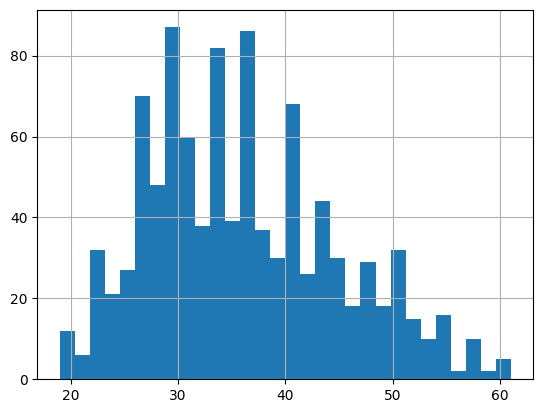

In [25]:
# plotting distribution of indivisual columns
df['Age'].hist(bins=30)


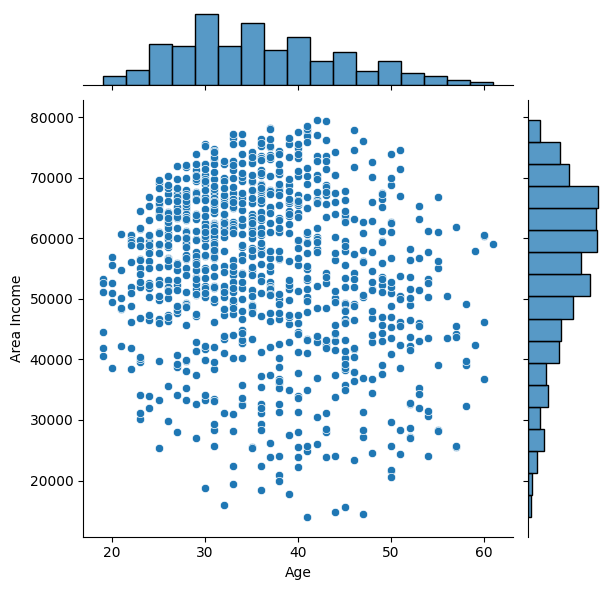

In [26]:
# Creating a jointplot showing Area Income versus Age.

sns.jointplot(x='Age', y='Area Income', data=df, kind='scatter')


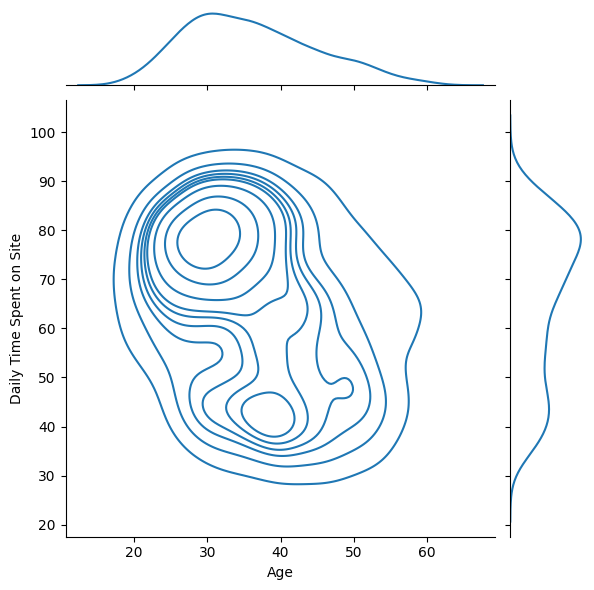

In [27]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde')
# creates a comparision plot between age and dailt time spent on the site ..
# kde is kernel density estimation

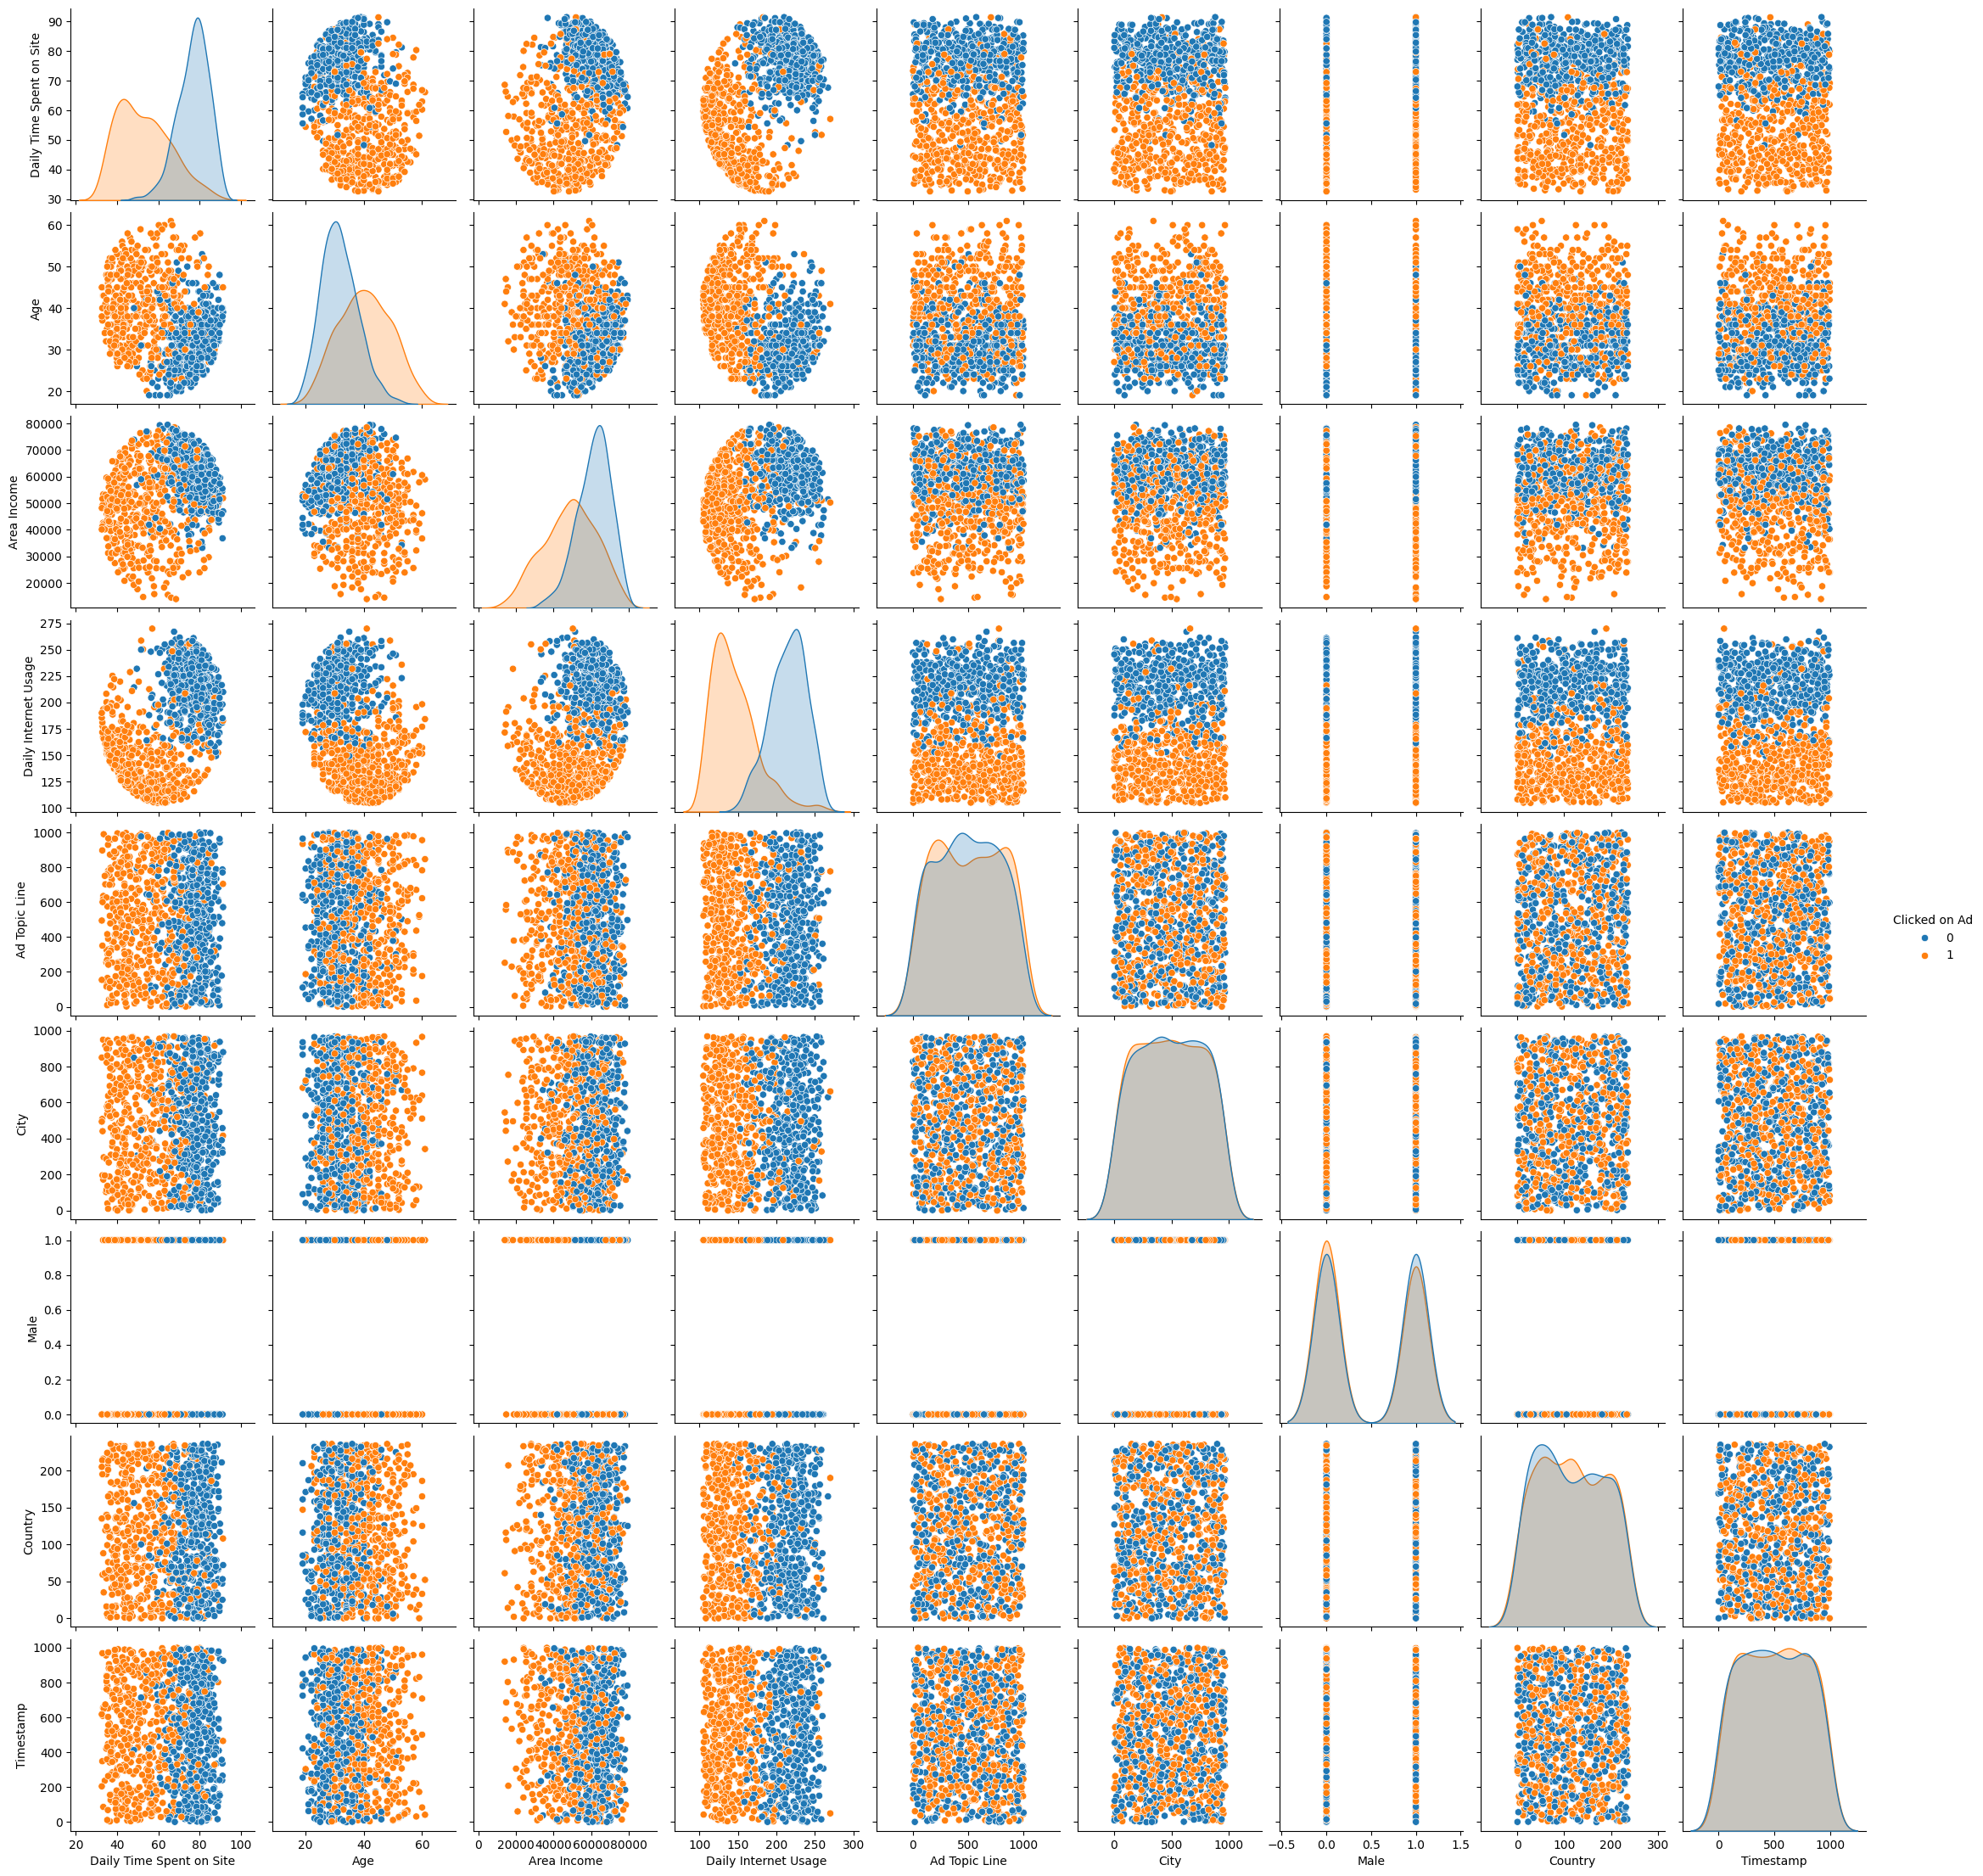

In [28]:
sns.pairplot(df, hue='Clicked on Ad')
# The Seaborn Pairplot allows us to plot pairwise relationships between variables within a data set. This creates a visualization of the data and summarizes a large amount of data into a single figure to make it easier to understand

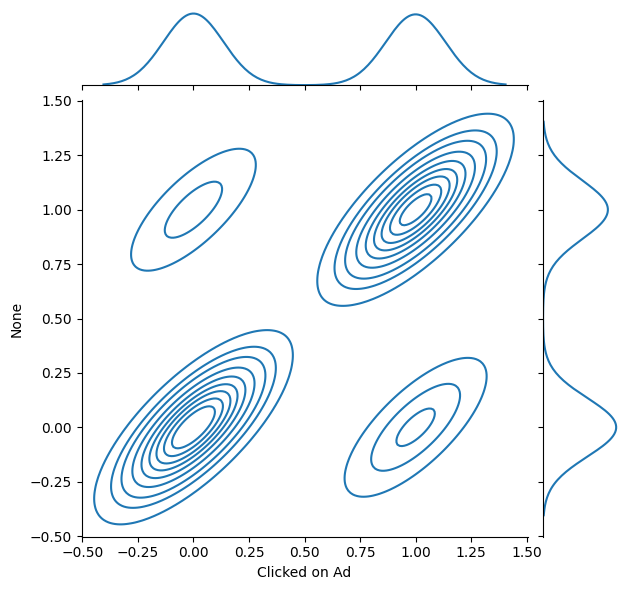

In [29]:
sns.jointplot(x=Y_train, y=training_predictions, kind='kde')
# creating a comparision plot between Y_train and the training predictions , you can see that the plot is more concentrated on 0,0 and 1,1 proving that most of the values were predicted same .

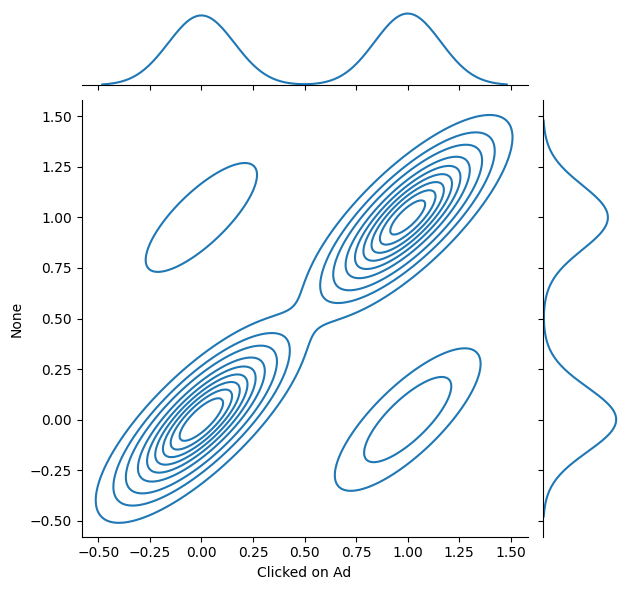

In [30]:
sns.jointplot(x=Y_test, y=testing_predictions, kind='kde')
# similarly for the testing set

WITHOUT ENCODING -

In [31]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

   Ad Topic Line  City  Male  Country  Timestamp  Clicked on Ad  
0             91   961     0      215        439              0  
1            464   903     1      147        474              0  
2            566   111     0      184        367              0  
3            903   939     1      103         56              0  
4            766   805     0       96        767              0

In [32]:
dff=pd.read_csv('/content/advertising.csv')
dff.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [33]:
# this is the original dataset without encoding
# we've called it back using pandas and a new dataframe name 'dff'

In [34]:
# splitting it into X and Y arrays
# while predicting whether the customer will click on the ad or not , columns except ad_topic_line , city , country and timestamp play effect so ,
X = dff[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = dff['Clicked on Ad']

In [35]:
print(X)
print(Y)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
995    1


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [37]:
print(len(X_train)) # it should be 800

800


In [38]:
regressor=LogisticRegression()

In [39]:
regressor.fit(X_train,Y_train)

LogisticRegression()

In [40]:
training_predictions=regressor.predict(X_train)

In [41]:
print(training_predictions)
print(len(training_predictions))

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0
 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 1 1 1 1 1 

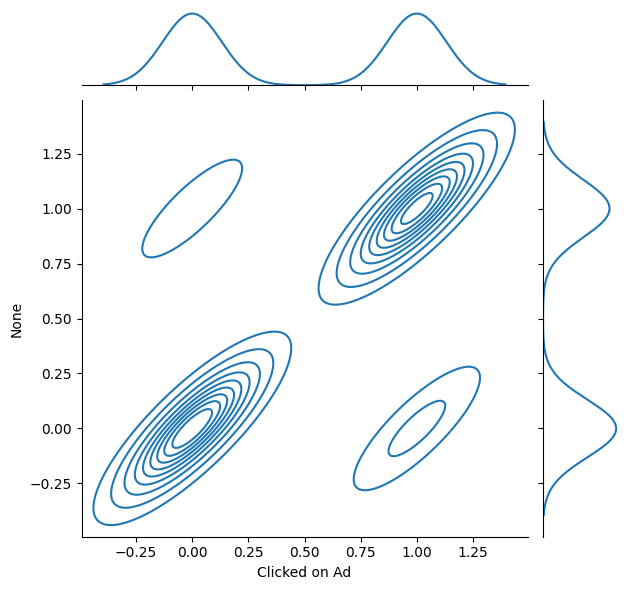

In [42]:
sns.jointplot(x=Y_train, y=training_predictions, kind='kde')
# makes sense

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(Y_train,training_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       400
           1       0.93      0.89      0.91       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



Execute the same model to find the predictions for the test dataset witout one hot encoding -